### Downloading and installing the PRAW package and its dependencies, allowing you to interact with Reddit's API

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


### Initializing a PRAW Reddit instance with client ID, client secret, and a user agent string

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="bV6KhjbL9qzNUKy0Oke3Hw",
    client_secret="AbBk1XxdlvzjvVEijs7R4OUPCIN78g",
    user_agent=user_agent
)

### Importing the pandas library & numpy

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

### Iterating through the submissions in the "bitcoin" subreddit using PRAW (Python Reddit API Wrapper) and printing various attributes of each submission.

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Mentor Monday, April 22, 2024: Ask all your bitcoin questions!
1ca4ccb
rBitcoinMod
1713769529.0
20
0.84
https://www.reddit.com/r/Bitcoin/comments/1ca4ccb/mentor_monday_april_22_2024_ask_all_your_bitcoin/
0


### Collects the titles of submissions in the "bitcoin" subreddit without duplicates by adding them to a set named headlines

In [5]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

618


### Creates a DataFrame from the set of headlines collected

In [10]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()


,0
0,Bitcoin Time Capsule Post
1,"My $1,000 vs 1 Bitcoin Decision."
2,POV: This sub 1 month from now
3,Bitcoin savings plan for my kids
4,Pomp: Bitcoin Crash to $64k Was A Dream A Year...


In [11]:
bitcoin_df.columns = ['text']

### returns the column names of the DataFrame bitcoin_df

In [12]:
bitcoin_df.columns

Index(['text'], dtype='object')

### Rename the column name to 'Titles'

In [13]:
bitcoin_df.columns = ['Titles']


In [14]:
bitcoin_df.head() #displays the first 5 rows of the DataFrame


,Titles
0,Bitcoin Time Capsule Post
1,"My $1,000 vs 1 Bitcoin Decision."
2,POV: This sub 1 month from now
3,Bitcoin savings plan for my kids
4,Pomp: Bitcoin Crash to $64k Was A Dream A Year...


### Checks for duplicate titles in the DataFrame 'bitcoin_df'

In [15]:
bitcoin_df.Titles.duplicated().sum() 

0

### Created a function cleanTxt() to remove various elements like mentions, hashtags, retweet tags, hyperlinks, and colons from the text

In [16]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Bitcoin Time Capsule Post
1,"My $1,000 vs 1 Bitcoin Decision."
2,POV This sub 1 month from now
3,Bitcoin savings plan for my kids
4,Pomp Bitcoin Crash to $64k Was A Dream A Year Ago


### Defined a function remove_emoji() that utilizes a regular expression pattern to match emojis and Unicode characters and replace them with an empty string

In [17]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Bitcoin Time Capsule Post
1,"My $1,000 vs 1 Bitcoin Decision."
2,POV This sub 1 month from now
3,Bitcoin savings plan for my kids
4,Pomp Bitcoin Crash to $64k Was A Dream A Year Ago


### Installing the TextBlob library using pip

In [18]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [19]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### Calculates the subjectivity and polarity of the text in the "text" column of DataFrame bitcoin_df using TextBlob and add the results as new columns

In [20]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Bitcoin Time Capsule Post,0.0,0.0
1,"My $1,000 vs 1 Bitcoin Decision.",0.0,0.0
2,POV This sub 1 month from now,0.0,0.0
3,Bitcoin savings plan for my kids,0.0,0.0
4,Pomp Bitcoin Crash to $64k Was A Dream A Year Ago,0.0,0.0


### Categorize the polarity scores into different insight categories: "Negative", "Neutral", and "Positive"

In [21]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Bitcoin Time Capsule Post,0.000000,0.000000,Neutral
1,"My $1,000 vs 1 Bitcoin Decision.",0.000000,0.000000,Neutral
2,POV This sub 1 month from now,0.000000,0.000000,Neutral
3,Bitcoin savings plan for my kids,0.000000,0.000000,Neutral
4,Pomp Bitcoin Crash to $64k Was A Dream A Year Ago,0.000000,0.000000,Neutral
5,What if no nonce can mine a block?,0.000000,0.000000,Neutral
6,I was gullible and stupid I know.,1.000000,-0.800000,Negative
7,Is what it is!!,0.000000,0.000000,Neutral
8,This is a very interesting video that compares...,0.650000,0.650000,Positive
9,This weeks market report,0.000000,0.000000,Neutral


### Importing additional libraries for visualization: seaborn, wordcloud, and matplotlib

In [22]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Plotting the count of sentiment categories ("Negative", "Neutral", and "Positive") using a bar plot

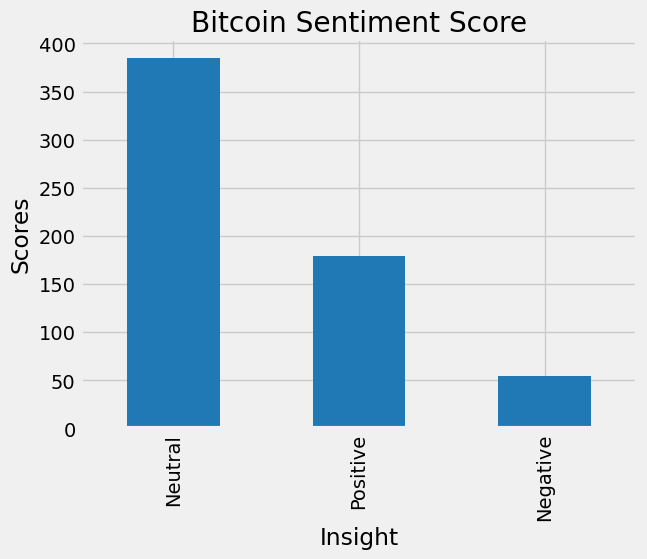

In [23]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

### word cloud visualization based on the text data from the 'Titles' column of the DataFrame 'bitcoin_df'

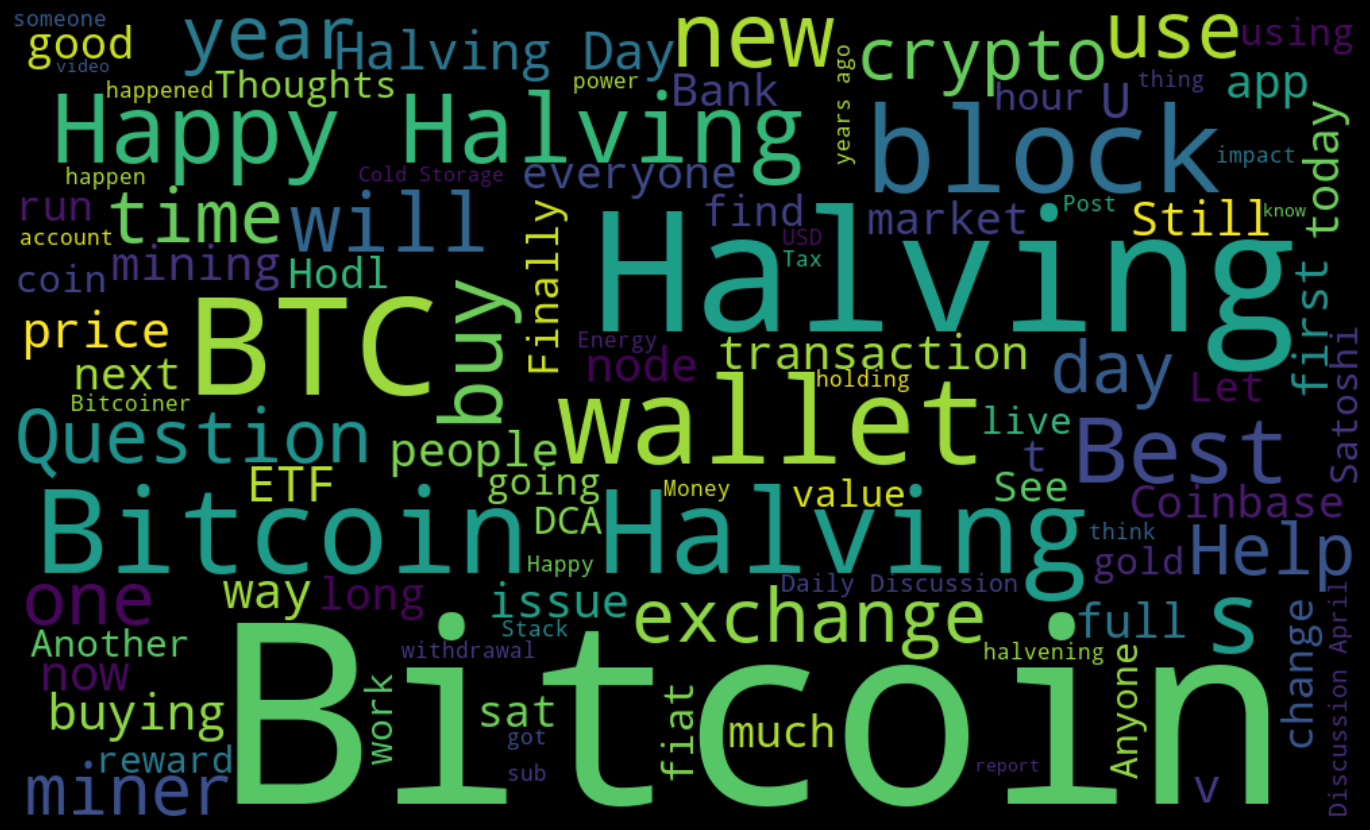

In [24]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");